## Gentle introduction to Linear Regression, Decision Tree and Random Forest Regressor
Here, I am using the Graduate Admission 2 dataset from kaggle (https://www.kaggle.com/datasets/mohansacharya/graduate-admissions/code)
to predict the chances of admission to grad school based on the student profile and university ranking.

In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [34]:
df = pd.read_csv("./Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [35]:
#inspect the dataframe
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 400, Columns: 9


In [36]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [39]:
#check if there are NaN values in any of the columns of the dataframe
nan_values = df.isna().sum()
print(nan_values)

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [37]:
#drop unwanted column
df = df.drop(["Serial No."], axis=1)

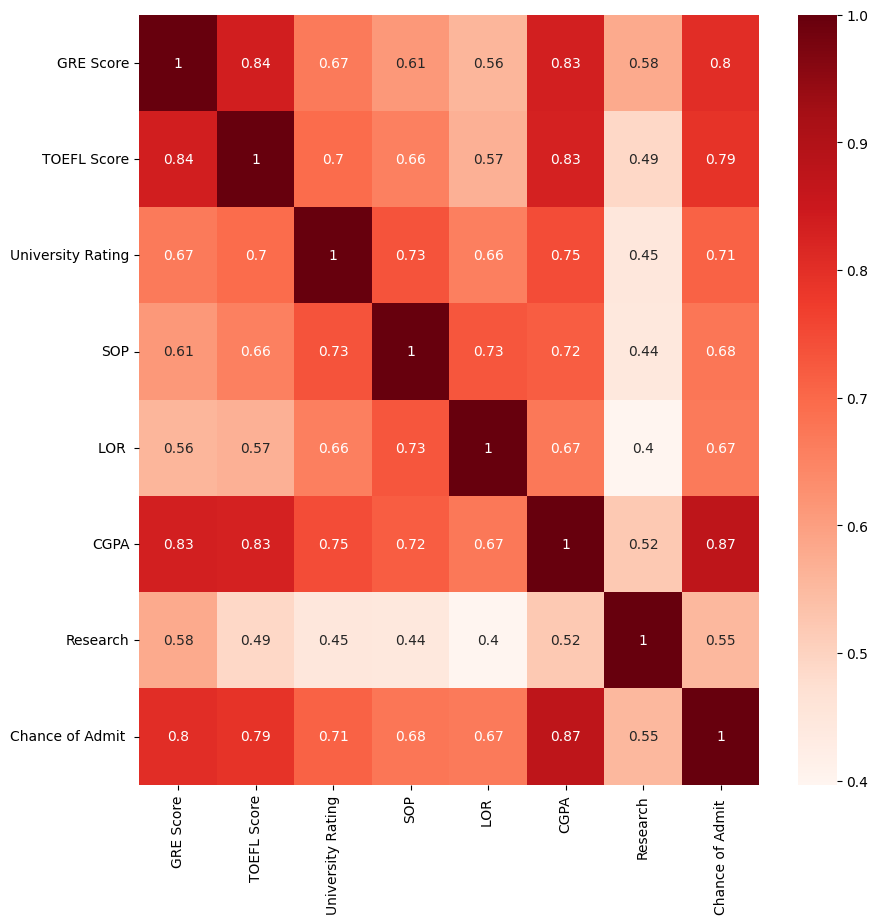

In [38]:
#Using Pearson Correlation to see the correlation between input features and target
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Input features and target variable
Input features (X) and target variables (y) are the major components of supervised machine learning. The target variables are independent variables or predictors that are used to make predictions about the target variable. The input features can be numerical, categorical, or a combination of both. 
The target variables are the outcomes or the value that we want to predict. 
We separate the input fratures from target variables to perform some feature engineering. This can mean transforming, scaling, encoding, or selecting features to improve the model's performance. 

### Train-Test split
for model training and model evaluation, we further split the input features and target variables into training set and testing set. 


In [40]:
#separating the independent variables(input features) and target variable
X = df.drop(["Chance of Admit "], axis = 1)
y = df["Chance of Admit "]
print(y.head())
print(X.head())

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64
   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4  4.5   4.5  9.65         1
1        324          107                  4  4.0   4.5  8.87         1
2        316          104                  3  3.0   3.5  8.00         1
3        322          110                  3  3.5   2.5  8.67         1
4        314          103                  2  2.0   3.0  8.21         0


### Using StandardScaler
The features in each columns of the dataframe have different scales and can lead to uneven influence of one feature compared to another during model training. We use StandardScaler, which is a preprocessing technique in scikit-learn to standardize of normalize the features. This helps the algorithms like K-nearest neighbors, support vecter machines, etc. to perform better.It makes the features more comparable and improves interpreability of the dataset. 

In [51]:
from sklearn.preprocessing import StandardScaler
x_scale = StandardScaler()
X = x_scale.fit_transform(X)
print(X)
y = np.array(y)

[[ 1.76210664  1.74697064  0.79882862 ...  1.16732114  1.76481828
   0.90911166]
 [ 0.62765641 -0.06763531  0.79882862 ...  1.16732114  0.45515126
   0.90911166]
 [-0.07046681 -0.56252785 -0.07660001 ...  0.05293342 -1.00563118
   0.90911166]
 ...
 [ 1.15124883  1.41704229  0.79882862 ...  1.16732114  1.42900622
   0.90911166]
 [-0.41952842 -0.72749202 -0.07660001 ...  0.61012728  0.30403584
  -1.09997489]
 [ 1.41304503  1.58200646  0.79882862 ...  0.61012728  1.78160888
   0.90911166]]


In [53]:
#creating a train-test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("The model accuracy is: ", accuracy)
print("Mean Squared Error is: ", mse)

The model accuracy is:  0.8212082591486991
Mean Squared Error is:  0.004617003377285013


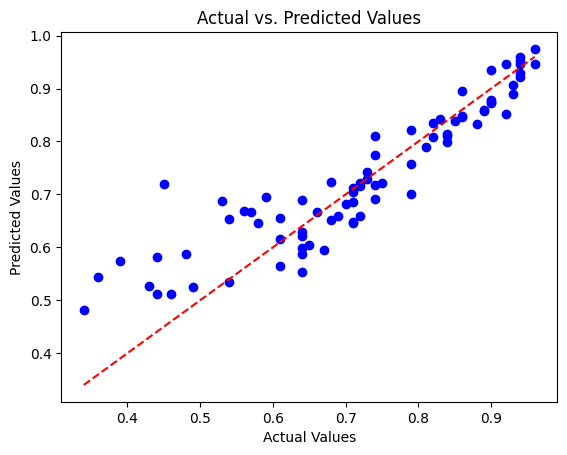

In [60]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


## using Decision Tree

In [63]:
from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

DecisionTreeRegressor()

In [70]:
accuracy = model2.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.6421360263085445


## Using Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor(n_estimators = 100, max_depth = 10)
model3.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

In [72]:
accuracy = model3.score(X_test, y_test)
print("Accuracy of Random Forest: ", accuracy)

Accuracy of Random Forest:  0.8080934939091494
